In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
 
 
%matplotlib inline

In [28]:
'''
reading from google drive dataset
'''
anyoneWithLink='https://drive.google.com/file/d/1u0FVgsWtGPcHpnBlbfL1LBX0Vmhbiu-x/view?usp=sharing'
path='https://drive.google.com/uc?export=download&id='+anyoneWithLink.split('/')[-2]

housingDf=pd.read_csv(path)

In [29]:
housingDf.shape

(10692, 13)

In [30]:
housingDf.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


# Missing value checking

In [31]:
housingDf.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

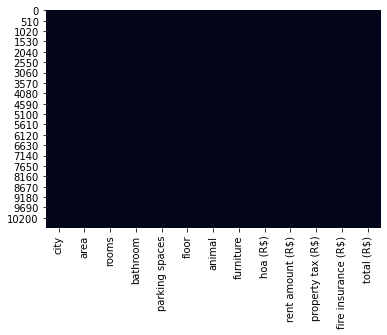

In [32]:
sns.heatmap(housingDf.isnull(),cbar=False)

# Data Exploration and Feature Engineering

In [33]:
housingDf.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [34]:
housingDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


## Converting to Numerical Value

In [35]:
'''
converting categorical to numerical value
'''
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
housingDf['animal']= np.where(housingDf['animal']=='acept',1,0)
housingDf['furniture']=np.where(housingDf['furniture']=='furnished',1,0)
housingDf['city']=le.fit_transform(housingDf['city'])

In [36]:
'''
floor contains - which should be zero 
'''
for i in housingDf.select_dtypes('object'):
    print(i,housingDf[i].unique())

floor ['7' '20' '6' '2' '1' '-' '4' '3' '10' '11' '24' '9' '8' '17' '18' '5'
 '13' '15' '16' '14' '26' '12' '21' '19' '22' '27' '23' '35' '25' '46'
 '28' '29' '301' '51' '32']


In [37]:
housingDf['floor'] = housingDf['floor'].apply(lambda x: 0 if x == '-' else x).astype(int) 

In [38]:
'''
We can comine furniture and animal as unique inclusions 
'''

housingDf['unique_inclusions_cnt'] = housingDf['furniture']+housingDf['animal']

In [39]:
'''
Dropping furniture,animal as unique_inclusions_cnt=comb(furniture,animal)
'''

housingDf.drop(['furniture','animal'],axis=1,inplace=True)

In [40]:
housingDf.head()

,city,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),unique_inclusions_cnt
0,4,70,2,1,1,7,2065,3300,211,42,5618,2
1,4,320,4,4,0,20,1200,4960,1750,63,7973,1
2,2,80,1,1,1,6,1000,2800,0,41,3841,1
3,2,51,2,1,0,2,270,1112,22,17,1421,1
4,4,25,1,1,0,1,0,800,25,11,836,0


## Correlation between variables

In [41]:
# sns.pairplot(housingDf)

In [42]:
housingDf.corr()['rent amount (R$)'].sort_values(ascending=False)

rent amount (R$)         1.000000
fire insurance (R$)      0.987343
bathroom                 0.668504
parking spaces           0.578361
rooms                    0.541758
total (R$)               0.264490
city                     0.188571
area                     0.180742
unique_inclusions_cnt    0.172893
property tax (R$)        0.107884
floor                    0.073596
hoa (R$)                 0.036490
Name: rent amount (R$), dtype: float64

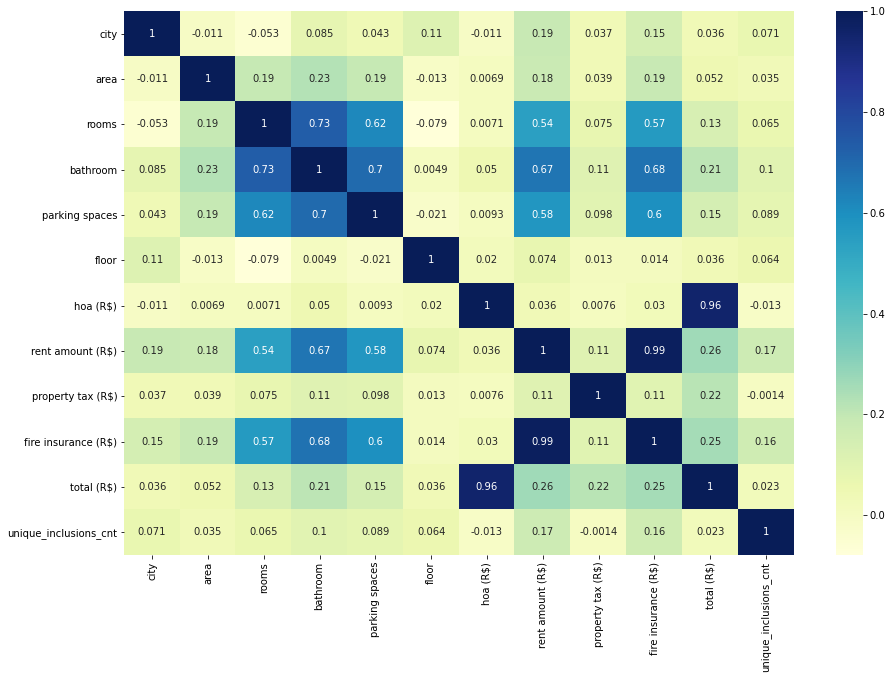

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(housingDf.corr(),annot=True,cmap="YlGnBu")

In [44]:
'''
Correlation with our target variables
'''
housingDf.corr()['rent amount (R$)'].sort_values(ascending=False)

rent amount (R$)         1.000000
fire insurance (R$)      0.987343
bathroom                 0.668504
parking spaces           0.578361
rooms                    0.541758
total (R$)               0.264490
city                     0.188571
area                     0.180742
unique_inclusions_cnt    0.172893
property tax (R$)        0.107884
floor                    0.073596
hoa (R$)                 0.036490
Name: rent amount (R$), dtype: float64

In [45]:
housingDf.corr()['rent amount (R$)'].sort_values(ascending=False)

rent amount (R$)         1.000000
fire insurance (R$)      0.987343
bathroom                 0.668504
parking spaces           0.578361
rooms                    0.541758
total (R$)               0.264490
city                     0.188571
area                     0.180742
unique_inclusions_cnt    0.172893
property tax (R$)        0.107884
floor                    0.073596
hoa (R$)                 0.036490
Name: rent amount (R$), dtype: float64

In [46]:
'''
Dropping beacause these features don't have any sigficant relationship (<< 0.2 ) with target 
'''
housingDf.drop(['floor','hoa (R$)','property tax (R$)','unique_inclusions_cnt'],axis=1,inplace=True)

In [47]:
housingDf.corr()['rent amount (R$)'].sort_values(ascending=False)

rent amount (R$)       1.000000
fire insurance (R$)    0.987343
bathroom               0.668504
parking spaces         0.578361
rooms                  0.541758
total (R$)             0.264490
city                   0.188571
area                   0.180742
Name: rent amount (R$), dtype: float64

# Test Train Split

In [48]:
from sklearn.model_selection import train_test_split,cross_validate

X = housingDf.drop(columns=['rent amount (R$)'])
y = housingDf['rent amount (R$)']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# Data Standardization

In [49]:
'''
Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale data.
'''

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

# Neural Network using sci kit learn

In [50]:

from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(hidden_layer_sizes=(19,19),activation='relu',solver='adam',max_iter=300)
nn.fit(X_train, y_train)
test_preds=nn.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Evaluation

In [51]:
'''
got score = 0.9563425257055517
'''
print(nn.score(X_test,y_test))

0.9833319743950686


Text(0, 0.5, 'Predicted values')

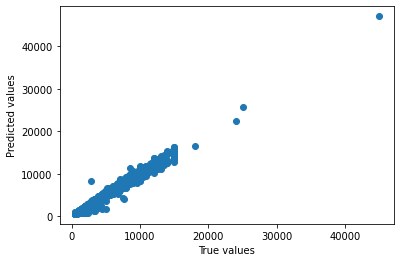

In [52]:
plt.scatter(y_test,test_preds)
plt.xlabel('True values')
plt.ylabel('Predicted values')